In [1]:
from jedno_pudlo.sym import simulate_birth_death_process

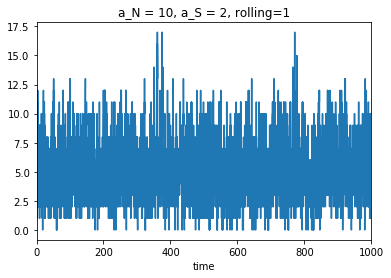

In [59]:
t = 1000
a_N = 10
a_S = 2
df_total = simulate_birth_death_process(t, a_N, a_S)
rolling_num = 1
df_total.set_index('time')['alive'].rolling(rolling_num).mean().plot(title=f'a_N = {a_N}, a_S = {a_S}, rolling={rolling_num}')

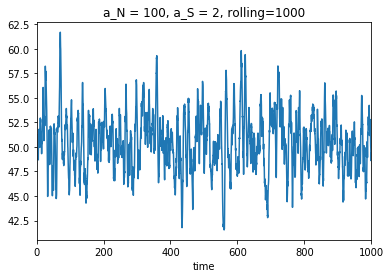

In [47]:
t = 1000
a_N = 100
a_S = 2
df_total = simulate_birth_death_process(t, a_N, a_S)
rolling_num = 1000
df_total.set_index('time')['alive'].rolling(rolling_num).mean().plot(title=f'a_N = {a_N}, a_S = {a_S}, rolling={rolling_num}')

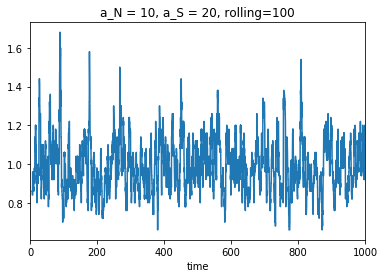

In [51]:
t = 1000
a_N = 10
a_S = 20
df_total = simulate_birth_death_process(t, a_N, a_S)
rolling_num = 100
df_total.set_index('time')['alive'].rolling(rolling_num).mean().plot(title=f'a_N = {a_N}, a_S = {a_S}, rolling={rolling_num}')

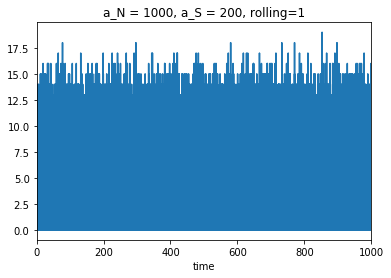

In [58]:
t = 1000
a_N = 1000
a_S = 200
df_total = simulate_birth_death_process(t, a_N, a_S)
rolling_num = 1
df_total.set_index('time')['alive'].rolling(rolling_num).mean().plot(title=f'a_N = {a_N}, a_S = {a_S}, rolling={rolling_num}')

In [19]:
t = 0.001
a_N = 100000
a_S = 4000

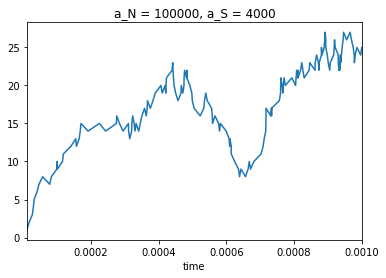

In [24]:
t = 0.001
a_N = 100000
a_S = 4000
df_total = simulate_birth_death_process(t, a_N, a_S)
df_total.set_index('time')['alive'].plot(title=f'a_N = {a_N}, a_S = {a_S}')

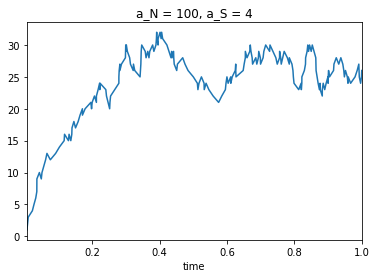

In [25]:
t = 1
a_N = 100
a_S = 4
df_total = simulate_birth_death_process(t, a_N, a_S)
df_total.set_index('time')['alive'].plot(title=f'a_N = {a_N}, a_S = {a_S}')

In [42]:
t = 1000
a_N = 100000
a_S = 4000
df_total = simulate_birth_death_process(t, a_N, a_S)
rolling_num = 10000000
df_total.set_index('time')['alive'].rolling(rolling_num).mean().plot(title=f'a_N = {a_N}, a_S = {a_S}, rolling={rolling_num}')

KeyboardInterrupt: 

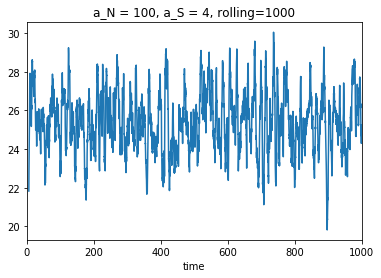

In [41]:
t = 1000
a_N = 100
a_S = 4
df_total = simulate_birth_death_process(t, a_N, a_S)
rolling_num = 1000
df_total.set_index('time')['alive'].rolling(rolling_num).mean().plot(title=f'a_N = {a_N}, a_S = {a_S}, rolling={rolling_num}')

In [21]:
df_total.head()

,time,type,balance,alive
87,0.000048,birth,1,1
102,0.000055,birth,1,2
74,0.000059,birth,1,3
37,0.000062,birth,1,4
102,0.000067,death,-1,3


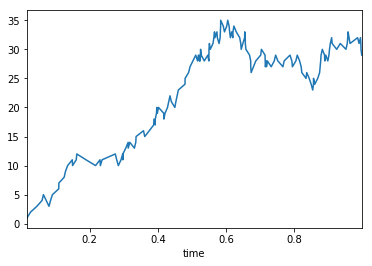

In [14]:
df_total.set_index('time')['alive'].plot()

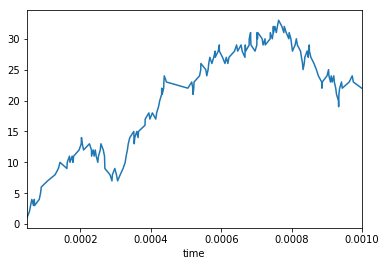

In [22]:
df_total.set_index('time')['alive'].plot()

In [57]:
t = 0.001
a_N = 100000
a_S = 4000
df_total = simulate_birth_death_process(t, a_N, a_S)
df_total['alive'].median()

20.0

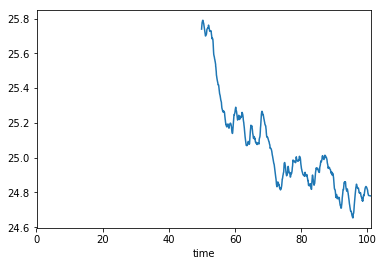

In [46]:
df_total.set_index('time')['alive'].rolling(10000).mean().plot()

In [42]:
(df_total['alive'] > 25).mean()

0.48651077904436835

In [41]:
df_total['alive'].mean()

25.49415826495088

In [24]:
df_total.head()

,time,type,balance,alive
1072177,0.011522,birth,1,1
3957931,0.040371,birth,1,2
1097954,0.068420,birth,1,3
3019514,0.080421,birth,1,4
5809421,0.087527,birth,1,5


In [29]:
df_total['time_lasting'] = df_total['time'].shift(-1) - df_total['time']

In [31]:
df_total = df_total[df_total['time'] < t]

In [32]:
df_total.head()

,time,type,balance,alive,time_lasting
1072177,0.011522,birth,1,1,0.028848
3957931,0.040371,birth,1,2,0.028049
1097954,0.068420,birth,1,3,0.012001
3019514,0.080421,birth,1,4,0.007106
5809421,0.087527,birth,1,5,0.001329


In [34]:
weights = df_total.groupby('alive')['time_lasting'].sum() / t

In [35]:
import numpy as np
np.average(weights.index, weights = weights.values)

50.00089595752573

In [36]:
df_total['alive'].mean()

50.50040173161628